<a href="https://colab.research.google.com/github/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/blob/main/Interna%C3%A7%C3%B5es_no_Brasil_Uma_an%C3%A1lise_explorat%C3%B3ria_entre_2010_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Projeto Módulo 1
 Internações no Brasil: Uma análise exploratória entre 2010-2020 </font>

Elaborado por [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

Data: 14/11/2021

Durante o primeiro módulo do bootcamp Data Science 2021 da Alura, podemos observar uma análise em relação aos **valores** gastos em procedimentos hospitalares no Brasil desde 2008.

Utilizamos os dados de [Produção Hospitalar do DATASUS](https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/).

Durante este projeto continuarei a utilizar ela como principal fonte de dados para o projeto, em conjunto com os dados de [Estimativa de população residente ](https://datasus.saude.gov.br/populacao-residente), também do DATASUS.


---

### Projeto

Esta análise pretende explorar os dados de **internações** no Brasil, no período entre 2010-2020.



> *Foi escolhido a delimitação do período, devido a ainda estarmos durante o ano de 2021.*


A análise será realizada através do entendimento dos seguintes dados de **internações**:

1. Internações X Valores gastos em procedimentos hospitalares:
    *   Número total de internações por ano de processamento
    *   Valor total gasto por ano de processamento.
2. Internações por região
    *   Número de internações por região
3. Internações por UF (Unidade Federativa)
    *   Número de internações por UF
    *   Número de internações por UF, proporcional ao número de habitantes.  
4. Internações por complexidade
    *   Número de internações com alta e média complexidade.

### Hipótese

Diante dos dados iniciais de valores gastos, vistos durante a atividade do primeiro módulo. Deduzo inicialmente que o número de internações afeta o valor gasto em procedimentos hospitalares diretamente. 

Buscarei entender como se distribuem as internações para cada região, UF e como foram suas distribuições por complexidade.











### <font color= MediumSpringGreen> Bibliotecas utilizadas 



*   Pandas
*   Matplotlib
*   Numpy
*   Functools





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from functools import reduce


## <font color= MediumSpringGreen> Importação de dados

Realizei o download no Tabnet, dos arquivos necessários para eu trabalhar deixei eles salvos no [repositório](https://github.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021) do meu Github. 

A partir disso, realizei a importação diretamente para o notebook.

In [2]:
internacoes_regiao = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Intenacoes/Internacoes_AnoProcessamento_Regiao_20211114.csv',
                                 sep=';',encoding= 'ISO-8859-1', skiprows = 3, skipfooter = 11, thousands = '.', decimal=',', 
                                 engine='python')
valores_regiao = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/ValorTotal/ValorTotal_AnoProcessamento_Regiao_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1', skiprows = 3, skipfooter = 11, thousands = '.', decimal=',',
                            engine='python')
internacoes_AnoMes_regiao = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Intenacoes/Internacoes_AnoMesProcessamento_Regiao_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 11, thousands = '.', decimal=',', 
                            engine='python')
internacoes_Ano_uf = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Intenacoes/Internacoes_AnoProcessamento_UF_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 11, thousands = '.', decimal=',', 
                            engine='python')
internacoes_AnoMes_uf = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Intenacoes/Internacoes_AnoMesProcessamento_UF_20141114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 11, thousands = '.', decimal=',', 
                            engine='python')
pop_2010 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2010_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2011 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2011_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2012 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2012_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2013 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2013_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2014 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2014_20211114.csv',
                            sep=';',encoding= 'UTF-8',  skiprows = 3, skipfooter = 6, thousands = '.', decimal=',', 
                            engine='python')
pop_2015 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2015_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2016 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2016_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2017 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2017_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2018 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2018_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2019 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2019_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
pop_2020 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Populacao_Residente/PopulacaoResidente_2020_20211114.csv',
                            sep=';',encoding= 'ISO-8859-1',  skiprows = 3, skipfooter = 4, thousands = '.', decimal=',', 
                            engine='python')
complexidade = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Modulo1_Bootcamp_Data_Science_Alura_2021/main/Datasets/Complexidade/Complexidade_AnoMes_20211114.csv',
                            sep=';',encoding= 'UTF-8',  skiprows = 3, skipfooter = 12, thousands = '.', decimal=',', 
                            engine='python')


## <font color= MediumSpringGreen> 1. Internações X Valores gastos em procedimentos hospitalares:



Como ao decorrer do módulo 1 podemos observar os valores gastos em procedimentos hospitalares. 
Quis entender se o número de internações afetaria diretamente o valor gasto.


### <font color= MediumSpringGreen> 1.1 Manipulação de dados


### Número de internações Total

In [3]:
internacoes_regiao_total = internacoes_regiao.iloc[[5]]                         #Selecionando dados totais
internacoes_regiao_total = internacoes_regiao_total.drop(columns='Total')       #Excluindo linha "Total"
internacoes_regiao_total = internacoes_regiao_total.set_index('Região')         #Alterando o índice para a região
internacoes_regiao_total

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Região,,,,,,,,,,,
Total,11357965,11281571,11092589,11197160,11320287,11377716,11297068,11469861,11816641,12181726,10533763


### Número do valor gasto total

In [4]:
valores_regiao_total = valores_regiao.iloc[[5]]                                 #Selecionando dados totais
valores_regiao_total = valores_regiao_total.drop(columns='Total')               #Excluindo linha "Total"
valores_regiao_total = valores_regiao_total.set_index('Região')                 #Alterando o índice para a região
pd.options.display.float_format = "{:.2f}".format                               #Alterando o formato dos números
valores_regiao_total

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Região,,,,,,,,,,,
Total,10740754368.48,11308412465.19,11656121321.77,12698359917.70,13370407625.66,13787982841.84,14001103477.94,14518578158.32,15106388207.06,15816050492.89,16390748651.05


### <font color= MediumSpringGreen> 1.2 Visualização e análise


### **Quantidade de internações no Brasil de 2010-2020**

No gráfico abaixo, podemos observar que de 2010 até 2016 o número de internações no país se manteve em torno de 11 a 11,5 milhões.

A partir do ano de 2016 o número de foi aumentando até o ano de 2019, com o valor de aproximadamente 12,2 milhões. Mas em 2020 teve uma queda brusca para aproximadamente 10,6 milhões.

### **Valores gastos em procedimentos hospitalares no Brasil de 2010-2020**

Desde 2010 o valor gasto vem aumentando. Os números sofreram algumas oscilações, mas a tendência é de crescimento.


Text(0.5, 1.0, 'Valores gastos em procedimentos hospitalares no Brasil de 2010-2020')

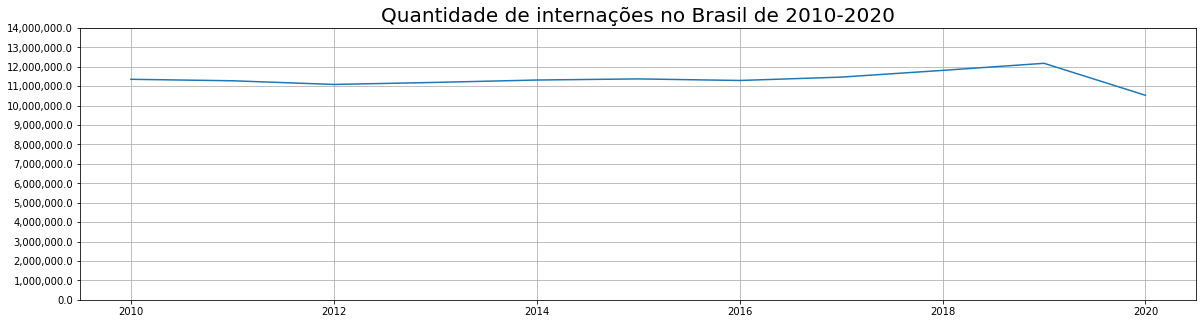

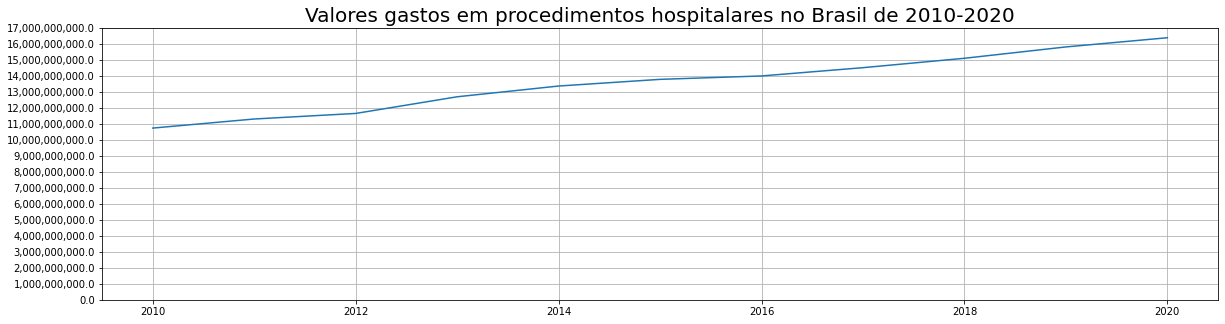

In [29]:
#Gráfico de internações
ax = internacoes_regiao_total.T.plot(figsize=(20,5), legend=None)               #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))             #Formatar números do eixo y

plt.yticks(np.arange(0, 15000000, step=1000000))                                #Mudar escala do eixo y
plt.grid()                                                                      #Colocar grade 
plt.title('Quantidade de internações no Brasil de 2010-2020',size=20)           #Adicionar Título

#Gráfico de valores gastos
ax = valores_regiao_total.T.plot(figsize=(20,5), legend=None)                   #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))             #Foramtar números do eixo y

plt.yticks(np.arange(0, 18000000000, step=1000000000))                          #Mudar escala do eixo y
plt.grid()                                                                      #Colocar grade 
plt.title('Valores gastos em procedimentos hospitalares no Brasil de 2010-2020',
          size=20)                                                              #Adicionar Título

### Análise

Mesmo com uma queda no número de internações no ano de 2020, o valor gasto continuou em crescimento.

Possivelmente devido a crise do Covid-19, as internações de casos menos graves podem ter sido adiadas. 

Sobre essa hipótese, encontrei este artigo do
[Observatório de Política e Gestão Hospitalar](https://www.observatoriohospitalar.fiocruz.br/debates-e-opinioes/pandemia-diminui-numero-e-muda-perfil-de-internacoes-no-sus-em-2020) da Fiocruz, no qual explica a possibilidade.


Entretanto entre 2010 e 2019, visualizei que os gráficos possuem certa correlação. 
Verificarei esta correlação:


Correlação do número de internações com o valor gasto total


In [6]:
internacoes_regiao_total.T.loc[:,'Total'].corr(valores_regiao_total.T.loc[:,'Total'])

0.15065345158676766

In [7]:
internacoes_regiao_total.T.iloc[:10].loc[:,'Total'].corr(valores_regiao_total.T.iloc[:10].loc[:,'Total'])

0.753358087165052

Os números gerados, foram o do [coeficiente de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson).

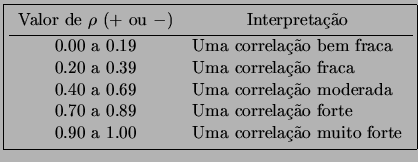

[*Fonte*](http://leg.ufpr.br/~silvia/CE003/node74.html)

De fato ao verificar os dados totais eles não possuem correlação entre eles, mas se retirarmos o ano de 2020, verificamos uma correlação forte.

O que podemos perceber que o número de internações é uma variável não determinante para aumentar ou diminuir o valor gasto.

## <font color= MediumSpringGreen> 2. Internações por região:

Com o objetivo de explorar os dados de internações, irei entender como eles se distribuíram por região do Brasil.

### <font color= MediumSpringGreen> 2.1 Manipulação de dados


Internações por ano/mês por região.

In [8]:
internacoes_AnoMes_regiao = internacoes_AnoMes_regiao.sort_values(by='Total', ascending=False)        #Ordenando por "Total"
internacoes_AnoMes_regiao = internacoes_AnoMes_regiao.drop(5)                                         #Retirando linha "Total" por ano
internacoes_AnoMes_regiao = internacoes_AnoMes_regiao.drop(columns='Total')                           #Retirando coluna "Total" por ano
internacoes_AnoMes_regiao['Região'] = internacoes_AnoMes_regiao['Região'].str.split(' ', n=1).str[1]  #Retirando código da região
internacoes_AnoMes_regiao = internacoes_AnoMes_regiao.set_index('Região')                             #Alterando o índice para a região
internacoes_AnoMes_regiao

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Sudeste,347855,333191,370951,369233,373171,361297,366964,370124,367594,357567,361652,363060,352164,350868,371651,370742,381267,361282,380952,368940,366400,362096,360329,355833,342497,338117,378158,364529,380089,368012,373922,379038,362971,365024,348044,332444,351716,330696,354033,374774,...,377295,381117,376265,370247,375260,359344,394732,397165,401012,389899,397352,400079,385670,395994,378554,369635,388554,374606,393560,401882,421575,399202,414183,418185,401975,416026,389613,378498,398203,376596,373619,300569,312286,318179,345179,342718,352428,361727,358767,350343
Região Nordeste,261223,248262,274745,273321,279612,267366,271539,274953,266674,268385,268151,257079,259958,258435,269522,272602,257363,263736,270918,263403,266419,265594,260713,258327,249962,243258,262155,265482,269182,263069,260666,261722,253391,247046,243599,225432,232807,229240,250430,260292,...,262857,263858,256002,249821,257408,242648,265810,273419,278785,267241,273899,276441,265050,271987,262286,248832,264043,250473,267607,274265,286284,273092,281601,283268,276316,279618,269718,259202,263949,253089,251689,203894,201124,205804,223345,225981,225734,240687,239666,228157
Região Sul,151467,145686,158708,159317,161813,157168,161176,162889,158434,158067,158590,158045,150432,147301,155499,153522,159110,161775,162125,153451,154001,157058,156669,151034,148952,148715,160884,153600,164520,163901,165453,168285,157058,158095,155926,143533,152019,145086,155875,161577,...,175331,173848,173094,168897,167095,162052,175547,177175,177293,177685,181353,181798,178122,178559,175182,167175,172712,169138,172979,175836,185958,181537,188536,186805,184373,188728,179475,171386,176111,177122,170414,137620,141201,135675,140550,143341,145966,158240,157138,148389
Região Norte,83935,82200,85459,85457,88344,85459,84637,82228,84099,84412,83661,81283,85246,82110,84474,85285,82560,84994,82796,80219,84698,81846,82388,84560,82249,80516,85776,84548,86562,85190,82125,73569,80416,79659,78261,74760,79076,81005,85564,86481,...,83918,84289,80871,80359,80946,78970,82247,83222,82929,84083,82759,84893,84068,87853,81990,79007,81316,79907,83466,84959,87835,84827,84707,84768,88232,87885,85012,82998,85158,83640,81950,65883,66237,68593,73130,78214,76159,77265,78243,75132
Região Centro-Oeste,75411,73555,78936,77151,78775,74565,74411,75802,75984,73901,73403,69568,71807,70854,76231,77299,75030,72238,72595,70675,73905,70804,69082,68384,67664,69303,72348,74496,72490,72617,71902,73777,71948,71093,68400,66189,70113,72646,75541,77233,...,74588,75155,72983,70277,72508,71045,75886,75290,78386,78433,78781,77118,76154,73111,70725,68699,74538,73728,79604,79537,82365,79015,81864,84600,78498,80605,75497,75154,77574,76840,78761,67323,65776,63646,65920,68664,66681,70449,68013,69012


### <font color= MediumSpringGreen> 2.2 Visualização e análise



**Quantidade de internações no Brasil por região de 2010-2020**

No gráfico abaixo, podemos observar que a região sudeste contém o maior número de internações, seguida pela região nordeste, sul e com aproximadamente a mesma quantidade norte e centro-oeste.



In [9]:
eixo_x = ['2010/Jan',           #Criando eixo x para o gráfico
          '2011/Jan',
          '2012/Jan',
          '2013/Jan',
          '2014/Jan',
          '2015/Jan',
          '2016/Jan',
          '2017/Jan',
          '2018/Jan',
          '2019/Jan',
          '2020/Jan',]

Text(0.5, 1.0, 'Quantidade de internações no Brasil de 2010-2020')

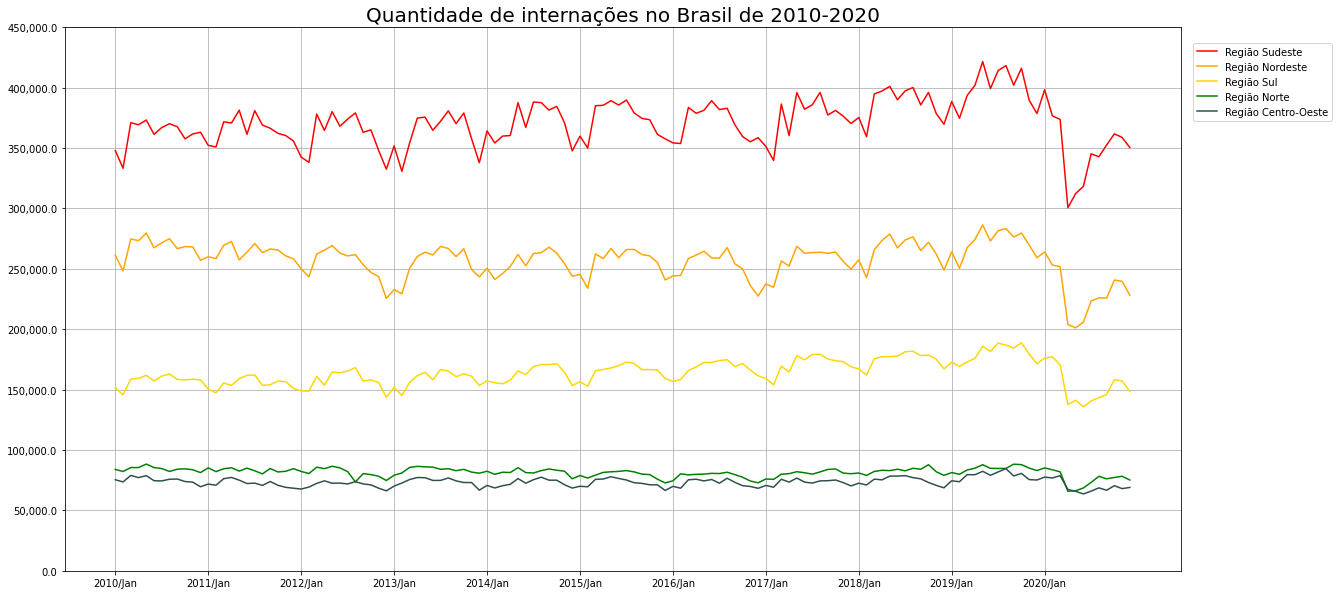

In [10]:
#Gráfico de internações por região
cores = ['red','orange', 'gold','green','darkslategray']
ax = internacoes_AnoMes_regiao.T.plot(figsize=(20,10),color=cores)              #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))             #Formatar números do eixo y
ax.legend(loc='center right', bbox_to_anchor=(1.14, 0.9))                        #Ajustar legenda

plt.xticks(np.arange(0, 132, step=12),labels=eixo_x) 
plt.yticks(np.arange(0, 500000, step=50000))                                  
plt.grid()                                                                      #Colocar grade 
plt.title('Quantidade de internações no Brasil de 2010-2020',size=20)           #Adicionar Título

### Análise

É interessante observar que em todas as regiões podemos visualizar uma certa similaridade entre os picos e vales ao decorrer do tempo.

Um ponto interessante para se observer nos demais gráficos por UF.

Assim como na queda no começo de 2020, devido ao covid-19.

## <font color= MediumSpringGreen> 3. Internações por UF (Unidade Federativa):

Com o objetivo de explorar os dados de internações, irei entender como eles se distribuíram por UF do Brasil.

### <font color= MediumSpringGreen> 3.1 Manipulação de dados


Criando dataframe com o total por UF no período

In [11]:
internacoes_AnoMes_uf_total = internacoes_AnoMes_uf.drop(27).set_index('Unidade da Federação')[['Total']]  #Criando df de quantidade total por uf


In [12]:
internacoes_AnoMes_uf_total.index = internacoes_AnoMes_uf_total.index.str.split(' ', n=1).str[1]           #Excluindo código da UF

Criando dataframe da população no período



> Modificando cada tabela





In [13]:
pop_2010.columns = ['Unidade da Federação','2010']                               #Modificando o Título da coluna
pop_2011.columns = ['Unidade da Federação','2011']                               #Modificando o Título da coluna
pop_2012.columns = ['Unidade da Federação','2012']                               #Modificando o Título da coluna
pop_2013.columns = ['Unidade da Federação','2013']                               #Modificando o Título da coluna
pop_2014.columns = ['Unidade da Federação','2014']                               #Modificando o Título da coluna
pop_2015.columns = ['Unidade da Federação','2015']                               #Modificando o Título da coluna
pop_2016.columns = ['Unidade da Federação','2016']                               #Modificando o Título da coluna
pop_2017.columns = ['Unidade da Federação','2017']                               #Modificando o Título da coluna
pop_2018.columns = ['Unidade da Federação','2018']                               #Modificando o Título da coluna
pop_2019.columns = ['Unidade da Federação','2019']                               #Modificando o Título da coluna
pop_2020.columns = ['Unidade da Federação','2020']                               #Modificando o Título da coluna




> Combinando tabelas



In [14]:
data_frames = [pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2020]  #listando dfs
populacao = reduce(lambda  left,right: pd.merge(left,right,on=['Unidade da Federação'],how='outer'), data_frames)   #Agrupando em uma única
                                            
populacao = populacao.set_index('Unidade da Federação')                                                             #Modificando index
populacao = populacao.drop('Total')
populacao.index = populacao.index.str.split(' ', n=1).str[1]                                                        #Excluindo código da UF

Modificando tabela de internações por ano por UF

In [15]:
internacoes_Ano_uf = internacoes_Ano_uf.drop(27)                                 #Excluindo linha de totais
internacoes_Ano_uf = internacoes_Ano_uf.drop(columns='Total')                    #Excluindo linha de totais


In [16]:
internacoes_Ano_uf['Unidade da Federação'] = internacoes_Ano_uf['Unidade da Federação'].str.split(' ', n=1).str[1]   #Excluindo código UF

In [17]:
internacoes_Ano_uf = internacoes_Ano_uf.set_index('Unidade da Federação')                             #Modificando índice


Criando tabela de internações por Ano e UF proporcional ao número de habitantes.

In [18]:
internacoes_habitante = internacoes_Ano_uf/populacao


In [19]:
internacoes_habitante['Total'] = internacoes_habitante.T.sum()

In [20]:

internacoes_habitante = internacoes_habitante.sort_values(by='Total',ascending=False)

### <font color= MediumSpringGreen> 3.2 Visualização e análise


**Quantidade de internações no Brasil por UF de 2010-2020**

No gráfico abaixo, podemos observar que o estado de São Paulo teve aproximadamente 4 vezes mais que o décimo estado do ranking (Santa Catarina). 

Text(0.5, 1.0, 'Total de internações por UF entre 2010-2020')

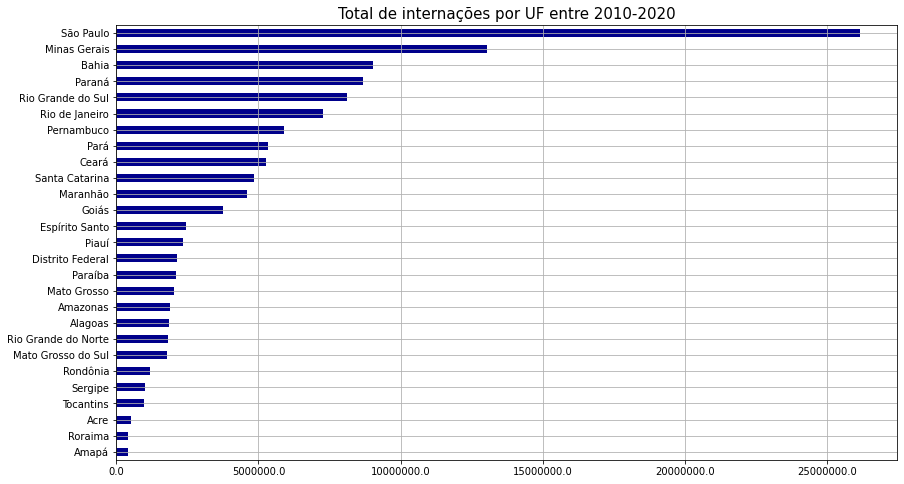

In [21]:
#Criando gráfico de barra para o total de internações por estado
internacoes_AnoMes_uf_total = internacoes_AnoMes_uf_total.sort_values(by=['Total'], ascending = True)
ax = internacoes_AnoMes_uf_total.plot.barh(figsize=(14,8),color='darkblue', legend=False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))

plt.ylabel(None)
plt.grid()
plt.title('Total de internações por UF entre 2010-2020',size=15)

### Análise 
O volume está muito desproporcional entre eles. Para verificar se está ocorrendo de fato isso, visualizarei o número de internações por habitantes.

Text(0.5, 1.0, 'Total de internações por habitante de UF entre 2010-2020')

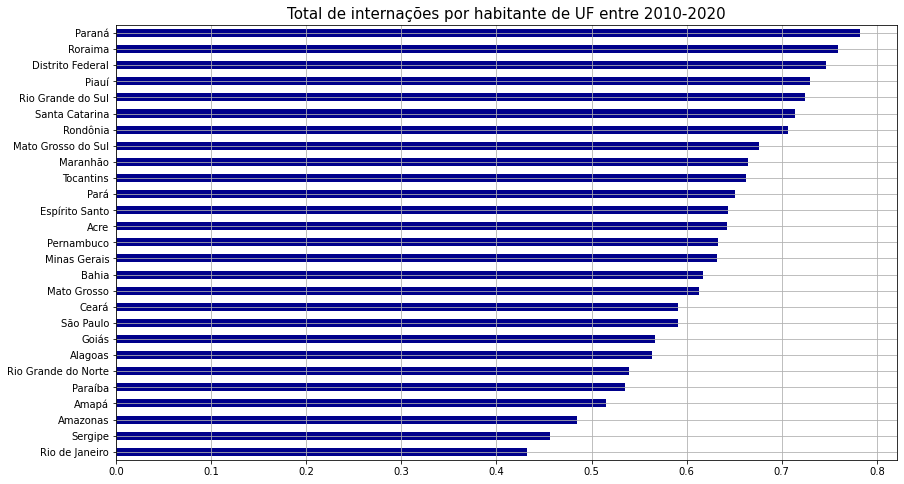

In [22]:
internacoes_total_habitante = internacoes_habitante[['Total']].sort_values(by='Total',ascending=True)
ax = internacoes_total_habitante.plot.barh(figsize=(14,8),color='darkblue', legend=False)

plt.ylabel(None)
plt.grid()
plt.title('Total de internações por habitante de UF entre 2010-2020',size=15)

O cenário em proporção ao número de habitantes modifica bastante. 

Na realidade as UFs com maior número de internações por habitante durante o período foram o Paraná, Roraima e Distrito Federal.

Será interessante em um segundo aprofundamento, entender para quais foram as finalidades das internações destes três estados.

Para se levantar mais hipóteses do por que eles possuem as maiores taxas e até mesmo fazer um comparativo com o Rio de Janeiro que apresentou a menor (com quase a metade do valor do Paraná).

## <font color= MediumSpringGreen> 4. Internações por complexidade durante o período:

Irei visualizar a quantidade de internações por nível de complexidade ao decorrer dos anos.

As internações em 2020 foram no geral com maior complexidade de fato como a hipótese levantada no ponto 1 deste projeto?

Vamos aos dados:

### <font color= MediumSpringGreen> 4.1 Manipulação de dados


In [23]:
complexidade = complexidade.drop(2).drop(columns='Total')                       #Excluindo linha e coluna de "Total"

In [24]:
complexidade = complexidade.set_index('Complexidade')                           #Modificando o index

### <font color= MediumSpringGreen> 4.2 Visualização e análise


**Quantidade de internações no Brasil por nível de complexidade**

Text(0.5, 1.0, 'Internações no Brasil por nível de complexidade UF de 2010-2020')

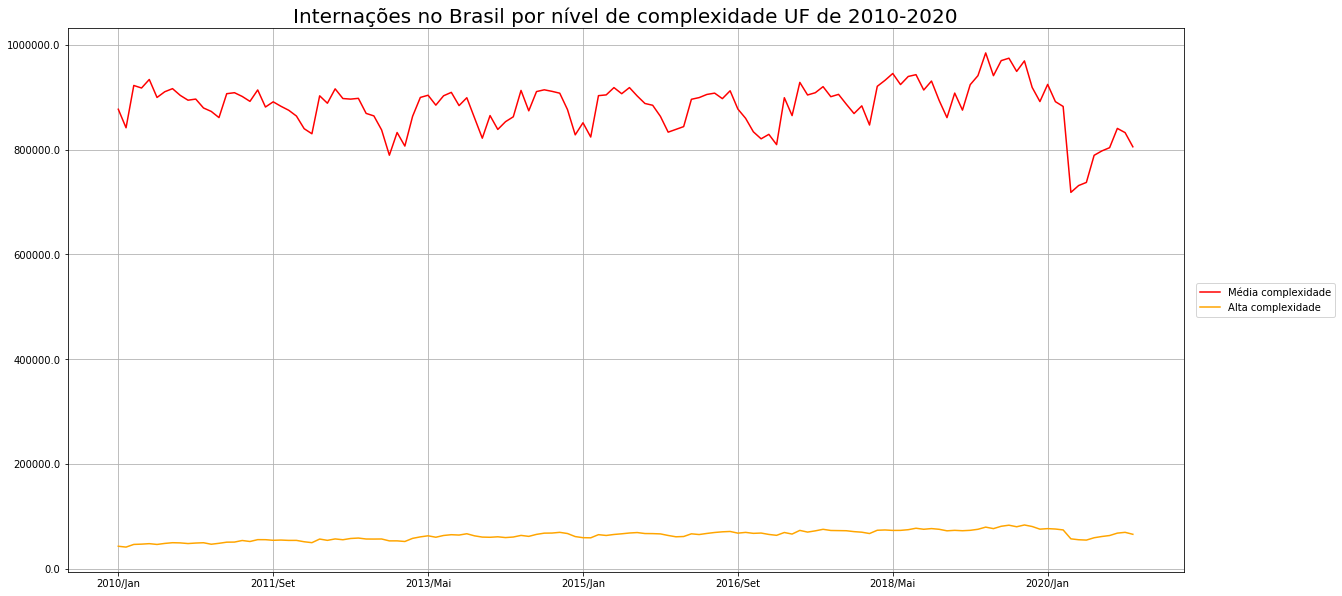

In [25]:
#Gráfico de internações por nível de complexidade
ax = complexidade.T.plot(figsize=(20,10),color=cores)                           #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))                  #Formatar números do eixo y
ax.legend(loc='center right', bbox_to_anchor=(1.14, 0.5))                       #Ajustar legenda

                             
plt.grid()                                                                      #Colocar grade 
plt.title('Internações no Brasil por nível de complexidade UF de 2010-2020',
          size=20)                                                              #Adicionar Título

### Análise

No gráfico acima, podemos observar que o maior volume de internações são de média complexidade.
Entrentanto irei realizar a visualização isolada dos dois gráficos para comparar o descréscimo no começo de 2020, se de fato as internações de média complexidade caíram mais. 

Text(0.5, 1.0, 'Internações no Brasil por nível de complexidade UF de 2010-2020')

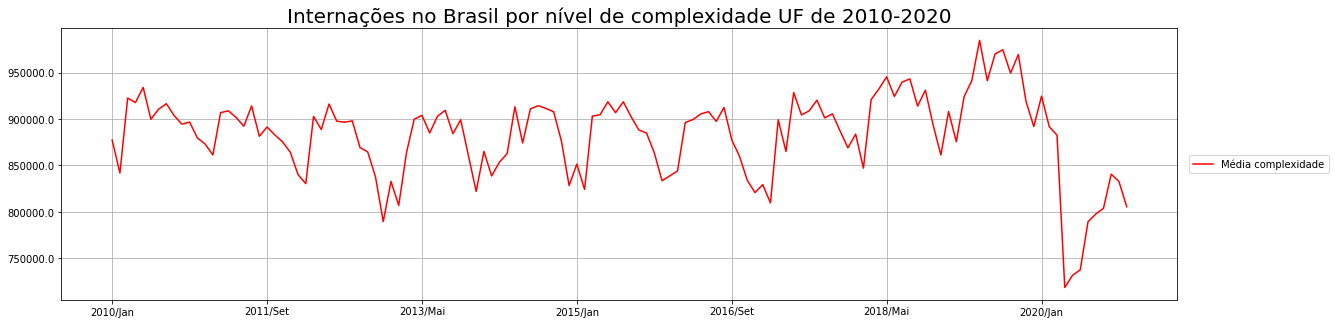

In [26]:
#Gráfico de internações por nível médio de complexidade
ax = complexidade.T['Média complexidade'].plot(figsize=(20,5),color=cores)      #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))                  #Formatar números do eixo y
ax.legend(loc='center right', bbox_to_anchor=(1.14, 0.5))                       #Ajustar legenda
                    
plt.grid()                                                                      #Colocar grade 
plt.title('Internações no Brasil por nível de complexidade UF de 2010-2020',
          size=20)                                                              #Adicionar Título


Text(0.5, 1.0, 'Internações no Brasil por nível de complexidade UF de 2010-2020')

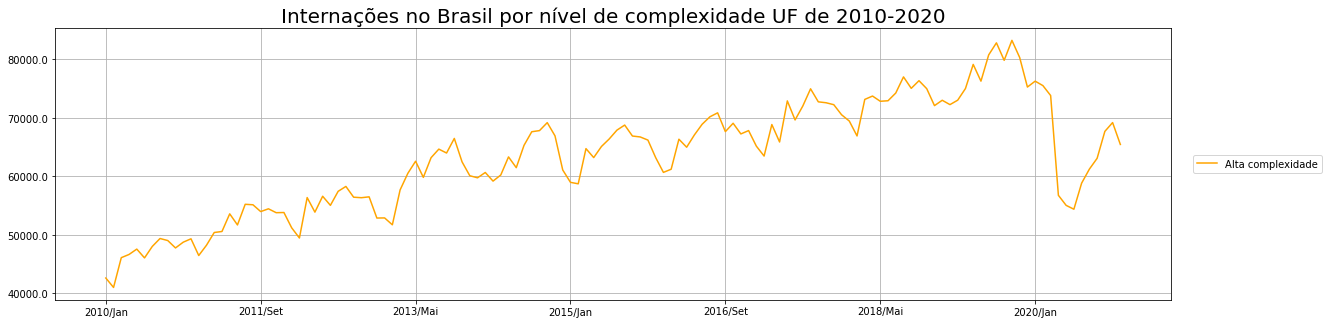

In [27]:
#Gráfico de internações por nível alto de complexidade
ax = complexidade.T['Alta complexidade'].plot(figsize=(20,5),color='orange')       #Criar gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))                  #Formatar números do eixo y
ax.legend(loc='center right', bbox_to_anchor=(1.14, 0.5))                       #Ajustar legenda
                    
plt.grid()                                                                      #Colocar grade 
plt.title('Internações no Brasil por nível de complexidade UF de 2010-2020',
          size=20)                                                              #Adicionar Título

Ao verificar os números mais de perto, pode-se perceber que o descréscimo foi proporcionalmente próximo para os dois tipos de complexidade.

A média caiu de 880 mil para 720 mil, aproximadamente 20 %.
A alta caiu de 85mil para 55 mil, aproximadamente 35 %.

O que por sinal, proporcionalmente a complexidade mais alta diminuiu ainda mais do que a média. 



## <font color= MediumSpringGreen> 5. Considerações finais

Observei que minha hipótese inicial sobre a relação entre o número de internações e os valores gastos em procedimentos hospitalares estava errada.
Mesmo que haja uma relação, ela não é diretamente ligada como havia imaginado.

Consegui observar que as região sudeste, nordeste e sul possuem as maiores quantiades de internações.

Dentre as UF's o estado de SP possui um grande volume a mais do que os demais estados. O que me fez verificar a proporção por habitante. Ao verificar por habitante encontrei uma maior proporcionalidade, com o estado do PR liderando. 

Fica-se um ponto para em uma próxima análise, entender a razão do estado possuir uma maior quantidade de internações por pessoa. Aprofundar nos tipos de especialidades que foram realizadas estas internações, verificar a faixa etária da população e até mesmo fazer uma análise mais detalhada por município.

Dentre o nível de complexidade, também errei ao supor que internações com média complexidade teriam tido uma maior queda no começo do ano de 2020 (devido ao Covid-19) em relação as de alta complexidade.